# Analysis of Titanic Passenger Data 

This is fundamental study of how to use powerful tools in Data Science in order to import study, visualize and present the raw data in a format that is easy to understand. 

The data that was used comes from passenger data of survivors of the RMS Titanic (1912). Reference to this data comes from: https://www.kaggle.com/c/titanic/data


In [1]:
#Importing od modules need in the analysis:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data importing and cleaning

In [2]:
train_titanic = pd.read_csv('../2.01-lab-pandas-titanic/train.csv', delimiter=',')

#Set index as PassengerId
train_titanic.set_index(['PassengerId'], inplace=True)

### Displaying Data

In [3]:
#Return shape to see how much data is being used at this time
train_titanic.shape

(891, 11)

## B. Looking for missing data set


#### Importing missingno as a visualization utility to better able to identify the missing datasets. 


In [4]:
pip install quilt

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The data upon first examination looks as though there are missing values. it seem as though this data was taken from a sample size. There are other data values that would have been added. 

Also based on further external research it indicates that `Passengers: 2,435` and `Crew: 892`  which is a `Total: 3,547. `

That said the dataset provided is not complete. 

In [7]:
#over viewing th data provided

train_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


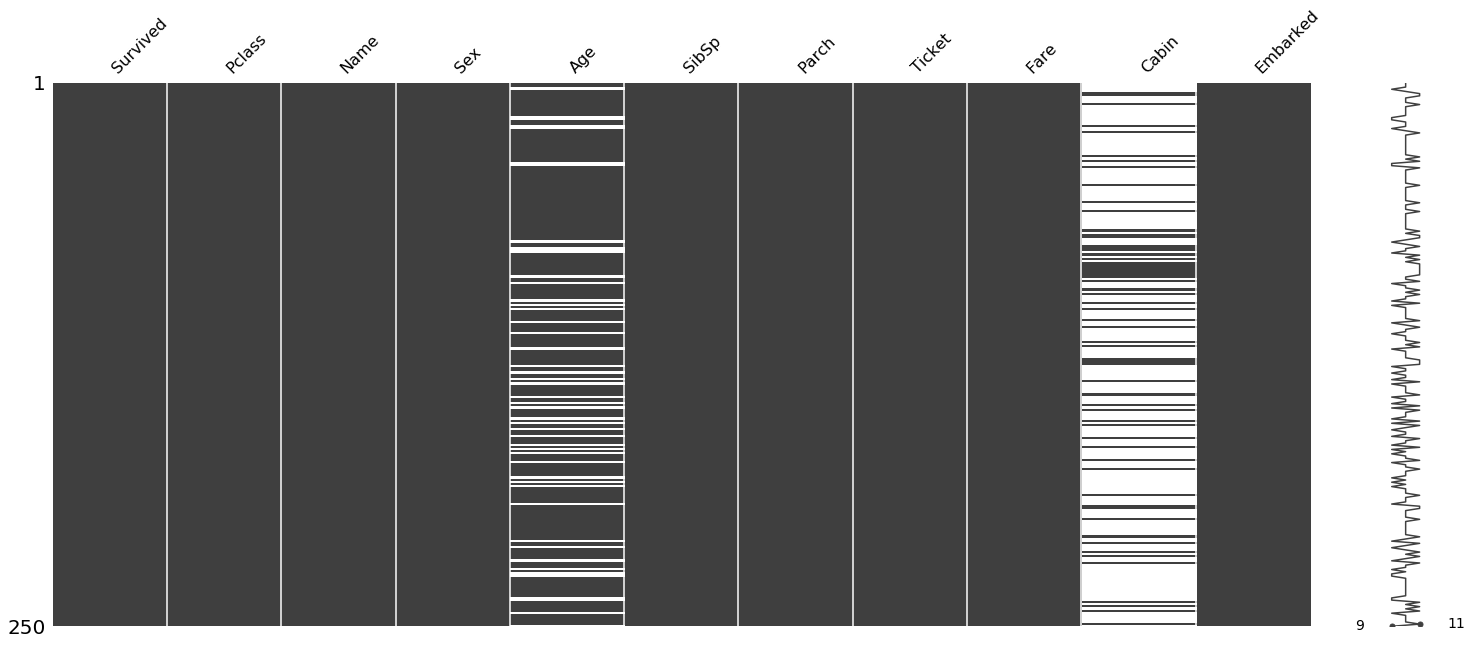

In [8]:
#imported Missingno to identify and highlight all missing values from columns
import missingno as msno
%matplotlib inline
msno.matrix(train_titanic.sample(250));
size = (150)

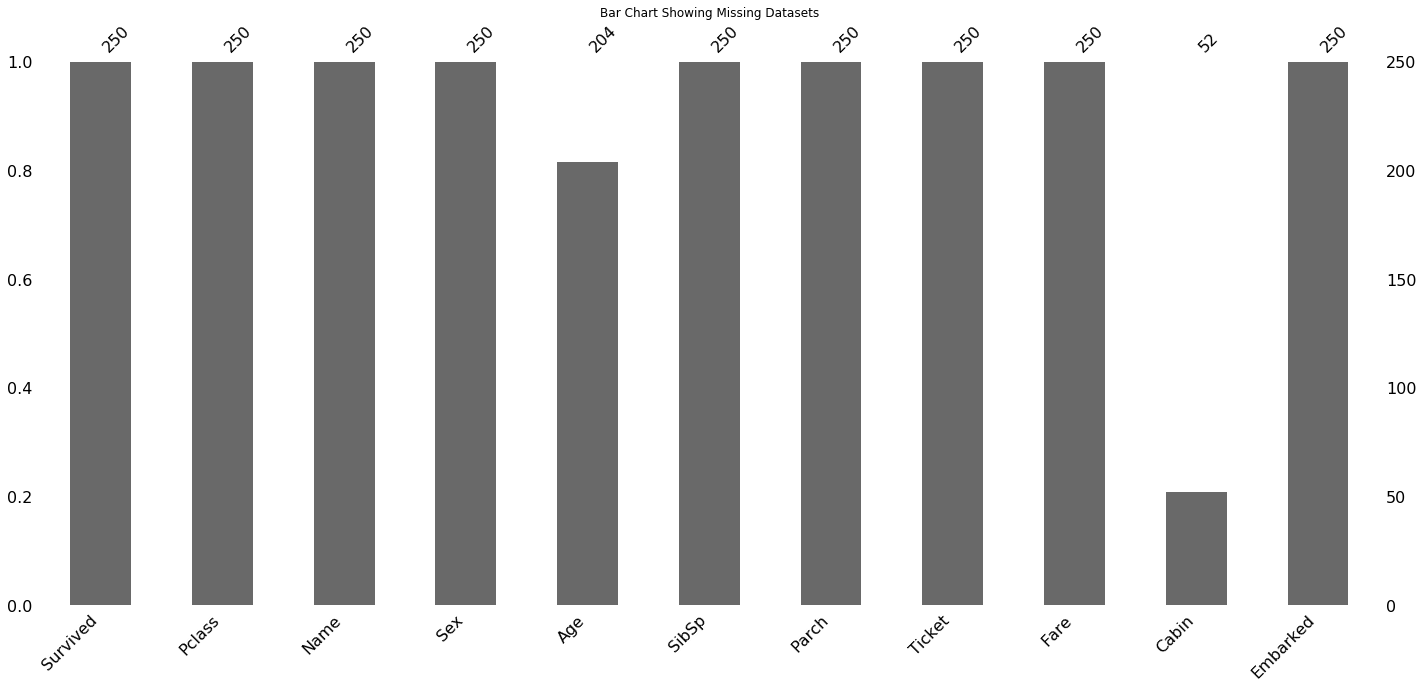

In [9]:
plt.figure(figsize=(22, 15))
msno.bar(train_titanic.sample(250));
plt.title('Bar Chart Showing Missing Datasets');

> `From first observations two Columns are missing value namely "Age" and "Cabin" columns.`


Also from further examination of the dataset we a re noticing that the columns only speak to the passenger information which would not compensate for the Crew members that were on board the vessel.

In [10]:
#This provides with  the raw statistics needed to overview the dataset. 
train_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## B. Data Cleaning and Managing Missing Data 


We will be going through the process of managing a assessing the data set we already have while compensating for the missing values. 


In [11]:
train_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print ('Missing data in each Titanic dataframe column:')
for c in train_titanic.columns:
    missing_data = len(train_titanic) - train_titanic[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round (float (missing_data / float(len(train_titanic))) * 100, 3)), '% of total')

Missing data in each Titanic dataframe column:
Age : 177 missing values is 19.865 % of total
Cabin : 687 missing values is 77.104 % of total
Embarked : 2 missing values is 0.224 % of total


The missing values identified in this datat frame are from the cabin column and age column. It shows that there are significant data values missing which could potencially skew the findings. The other assumption is that there cabin records where not entrered by the crew members.

This in itself posses some other questions why was it not entered and could it bear a greater presidence in finding out the main reason why the survival rate was what it ended up to be. 

## Cleaning the Port of Embarkation

In [13]:
#Fill empty/NaN Embark values with most common Embark value
train_titanic['Embarked'] = train_titanic['Embarked'].fillna(value=(train_titanic['Embarked'].value_counts().idxmax()))
# Replace Embarked letter with port name
train_titanic['Embarked'] = train_titanic['Embarked'].replace(['C'], 'Cherbourg')
train_titanic['Embarked'] = train_titanic['Embarked'].replace(['Q'], 'Queenstown')
train_titanic['Embarked'] = train_titanic['Embarked'].replace(['S'], 'Southampton')
# Print unique passenger titles and their counts
train_titanic['Embarked'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

Thre were not a few missing data from port embarked as a result I replaced the letter designating the port to the actual name of the port. (C = Cherbourg, Q = Queenstown, S = Southampton)

It shows that majority of the passengers boarded the vessel from Southhampton, England which was the first place it set sail.  

In [ ]:
train_titanic.Cabin.unique()

In [15]:
train_titanic.shape

(891, 11)

In [ ]:
train_titanic.apply(pd.value_counts)

## Fill empty Carbins with '¯\(ツ)/¯'

In [1]:
#Identified the missing values within each column
train_titanic.apply(pd.value_counts)

In [18]:
#Replaced NaN values with the symbol "'¯\(ツ)/¯'"
carbin_smile = lambda x:'¯\(ツ)/¯' if str(x) == 'nan' else x

In [19]:
train_titanic['Cabin'] = train_titanic['Cabin'].map(carbin_smile)

In [2]:
#This process allows for a clearer view statistically what data is availale and how it caan be assested for further analysis
train_titanic.head()

## 3. Create dummy columns for Embark Locations ('C', 'S', and 'Q'), and Sex ('Male' and 'Female')

### Embark Location Dummies

In [21]:
# Create dummy values for Embarked Locations
train_titanic[['Embarked_C','Embarked_Q','Embarked_S']] = pd.get_dummies(train_titanic['Embarked'])

### Sex Dummies Columns

In [22]:
# Create dummy values for Sex
train_titanic[['Sex_F', 'Sex_M']] = pd.get_dummies(train_titanic['Sex'])

Created two columns for Sex showing Sex_F and Sex_M with male = 1 and female = 0 respectfuly. 

In [ ]:
train_titanic.head()

In [24]:
#This speaks to the survival rate, age and passengers from the various locations of embarking.

train_titanic.groupby('Embarked').mean().T

Embarked,Cherbourg,Queenstown,Southampton
Survived,0.553571,0.389610,0.339009
Pclass,1.886905,2.909091,2.346749
Age,30.814769,28.089286,29.519335
SibSp,0.386905,0.428571,0.569659
Parch,0.363095,0.168831,0.411765
Fare,59.954144,13.276030,27.243651
Embarked_C,1.000000,0.000000,0.000000
Embarked_Q,0.000000,1.000000,0.000000
Embarked_S,0.000000,0.000000,1.000000
Sex_F,0.434524,0.467532,0.317337


This information brings to light a few assessment which is the percent of survivors from the voyage, where they embarked the age group of those indiviaduals. Also importantly the families that was there with them which possess a major factor in the passengers rate of survival. 

From first glasnce it shows that the more family your traveled with, the less you paid, the class you were placed in would drastically affect your rate of survival on that vessell. 

In [25]:
#Shows that place of embarking Southampton was the first place of departure of this voyage which potencially would have more passengers  
train_titanic['Embarked'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

### Title using Dummies

In [26]:
train_titanic['Family_count'] = train_titanic['SibSp']+ train_titanic['Parch']

In [27]:
train_titanic['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [28]:
# Split passenger titles in Name category and place in new 'TitleF' column
train_titanic['Title'] = train_titanic['Name'].map(lambda Name: Name.split(',')[1].split('.')[0].strip())
# Print unique passenger titles and their counts
train_titanic['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Capt              1
Don               1
Lady              1
Ms                1
Jonkheer          1
Mme               1
Sir               1
Name: Title, dtype: int64

In [29]:
#identifies the title of each recorded passenger
train_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

From first assessmeent there are few things that has to be examined which is the title and the better categorizing of these titles. As is, it does not clearly identifies who is male from female from these titles.

In [30]:
#Breafly shows the numbers of passengers based on the title
train_titanic['Title'].map(lambda x: 'Rev' if str(x) == 'nan' else x[0] ).value_counts()

M    870
D      8
R      6
C      3
L      1
J      1
t      1
S      1
Name: Title, dtype: int64

In [31]:
train_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_F,Sex_M,Family_count,Title
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,Southampton,0,0,1,0,1,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,0,0,1,0,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,Southampton,0,0,1,1,0,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,0,0,1,1,0,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,Southampton,0,0,1,0,1,0,Mr


In [32]:
# Create new 'MWC' column to store Man, Woman, Child descriptions
train_titanic['MWC'] = train_titanic['Title']
# Replace 'Mr' with 'Man'
train_titanic['MWC'] = train_titanic['MWC'].replace('Mr', 'Men')
# Replace 'Mrs' with 'Woman'
train_titanic['MWC'] = train_titanic['MWC'].replace('Mrs', 'Women')
# Replace 'Master' with 'Child'
train_titanic['MWC'] = train_titanic['MWC'].replace('Master', 'Children')
# Replace Misses with value in Age 14 and lower with 'Child'
train_titanic['MWC'] = train_titanic['MWC'].replace(train_titanic['MWC'].loc[(train_titanic.Age <= 12) &
                                                                    (train_titanic.MWC == 'Miss')], 'Children')
# Replace Misses with value in Age higher than 14 with 'Woman'
train_titanic['MWC'] = train_titanic['MWC'].replace(train_titanic['MWC'].loc[(train_titanic.Age > 12) &
                                                                    (train_titanic.MWC == 'Miss')], 'Women')
# Print MWC stats
print (train_titanic['MWC'].value_counts())
print ('')
print (train_titanic['MWC'].describe())

Men             517
Women           239
Children         72
Miss             36
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Capt              1
Don               1
Lady              1
Ms                1
Jonkheer          1
Mme               1
Sir               1
Name: MWC, dtype: int64

count     891
unique     17
top       Men
freq      517
Name: MWC, dtype: object


This is a clear out look and adjustment to the title and identifying clear seperation between subsets (Man, Woman, Children). This brings to light valuable insight as to what happened on the fatal voyage. 

Also there is a significance with this data which identifies the number children who were aboard the vessel based on this sample set. 

# Step 4: Exploratory Analysis


### 4. a. Overall Survival Rate

In [33]:
psg_all = train_titanic.shape[0]
psg_surv = train_titanic['Survived'].sum()
psg_surv_rate = psg_surv / psg_all
print(f'The overall survival rate is {round(psg_surv_rate * 100, 1)}%.')

The overall survival rate is 38.4%.


In [34]:
# Overall Survival rate
# 0 = died
# 1 = lived
train_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From first glance survival from that catastrofy was fatal many families perished based on the numbers indicated almost 65% casualties. 

### 4.b. Gender that fared the worst. What was their survival rate?

In [35]:
#Break down of Female and Male passengers and a brief statistic analysis of survial rate
describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

print("Train: Males")
print(train_titanic[train_titanic.Sex == "male"][describe_fields].describe())

print("Train: Females")
print(train_titanic[train_titanic.Sex == "female"][describe_fields].describe())



Train: Males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000
Train: Females
              Age        Fare      Pclass       SibSp       Parch
count  261.000000  314.000000  314.000000  314.000000  314.000000
mean    27.915709   44.479818    2.159236    0.694268    0.649682
std     14.110146   57.997698    0.857290    1.156520    1.022846
min      0.750000    6.750000    1.000000    0.000000    0.000000
25%     18.000000   12.071875    1.000000    0.0

In [36]:
# Calculating population by sex
psg_m = train_titanic['Sex_M'].sum() # Calculate male passerger population
psg_f = train_titanic['Sex_F'].sum() # Calculate female passenger population
male = train_titanic['Sex_M'] == 1   # mask for male
female = train_titanic['Sex_F'] == 1 # mask for female

In [37]:
# Calculate the average fare by sex
psg_m_avefare = train_titanic[male]['Fare'].mean()
psg_f_avefare = train_titanic[female]['Fare'].mean()
print(f'The average fare for male passenger is ${round(psg_m_avefare, 2)}, and \
      \nthe average fare for female passenger is ${round(psg_f_avefare, 2)}.') 
print(f'Therefore, female passengers were fared worse.')

The average fare for male passenger is $25.52, and       
the average fare for female passenger is $44.48.
Therefore, female passengers were fared worse.


In [38]:
# Calculate female passenger survival rate
psg_f_surv = train_titanic[female]['Survived'].sum()
psg_f_surv_rate = psg_f_surv / psg_f
print(f'The female passenger survival rate is {round(psg_f_surv_rate * 100, 1)}%.')

The female passenger survival rate is 74.2%.


> `The female fared the worst with average fare of 44.25 dollars compared to average fare of 25.52 dollars for male passengers.
The female passenger survival rate is 74.0%.`

>There a view outlayer at first glance which shows that there was a significance disparity with female and male passengers which indicated that most male passengers embarked alone paid less and than oppose to the female passengers. The reason for the signicance in the fare prices could be because they were travelling with children or small family.

In [39]:
# calculating the base probability for predicting survivorship

print( "Base probability for survivorship is", 342.0/(549+342))

Base probability for survivorship is 0.3838383838383838


## 3.c. Survival Rate for each Pclass

In [40]:
## number of passengers in each cabin class
psg_pclass = train_titanic.groupby('Pclass')['Pclass'].agg('count')
print(f'Number of passengers by Travel Class:\
      \n{psg_pclass}')


Number of passengers by Travel Class:      
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


In [41]:
# Calculate the number of survivors for each PClass
psg_pclass_surv = train_titanic.groupby('Pclass')['Survived'].agg('sum')
print(f'Number of survivors by Travel Class:\
      \n{psg_pclass_surv}.')

Number of survivors by Travel Class:      
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64.


In [42]:
# Calculate the survival for each PClass
psg_pclass_surv_rate = psg_pclass_surv / psg_pclass
print(f'The survival rate for each Travel Class: \
      \n{round(psg_pclass_surv_rate, 3)}')

The survival rate for each Travel Class:       
Pclass
1    0.630
2    0.473
3    0.242
dtype: float64


In [43]:
df_pclass_surv = pd.DataFrame(dict(Passenger = psg_pclass,
                                   Survived = psg_pclass_surv, 
                                   Survival_Rate = psg_pclass_surv_rate)).reset_index()
df_pclass_surv

,Pclass,Passenger,Survived,Survival_Rate
0,1,216,136,0.629630
1,2,184,87,0.472826
2,3,491,119,0.242363


Though this only shows the amount of passengers that where in class it does not shows survival based on class which we will examine shortly. 

In [44]:
#Suvival Rate for all Pclass categorized by sex 

print (train_titanic.groupby(["Pclass", 'Sex'])['Survived'].value_counts(normalize = True))

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


This operation allows the assessment of three columns (Pclass, Sex, Survived) whcih allows a more clearer evaluation of which individuals survived and which didn't. This data shows that the First class passengers where given priority to disembark th casiding vessl, specificly the women and potencially children. The other two classes where not so fortunate which shows that for the men over 70% did not survived and nearly 50% of women survived. 

It can be assumed that this would happen based on the placement of the classes why first and second class was given profference but once we have evaluated this further our conclusions will determine what actually happened.

## 4.d. Reverend that Survived 

In [45]:
train_titanic[(train_titanic['Title'] == 'Rev')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_F,Sex_M,Family_count,Title,MWC
PassengerId,,,,,,,,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,Southampton,0,0,1,0,1,0,Rev,Rev
151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,Southampton,0,0,1,0,1,0,Rev,Rev
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,Southampton,0,0,1,0,1,1,Rev,Rev
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Queenstown,0,1,0,0,1,0,Rev,Rev
849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,Southampton,0,0,1,0,1,1,Rev,Rev
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,Southampton,0,0,1,0,1,0,Rev,Rev


`There were six reverend aboard and unfortunately they did not survive.` 

## 4.e. Survival Rate for Cabins Marked ¯\(ツ)/¯

In [46]:
# Calculate total number of cabins marked ¯\(ツ)/¯

cabin_sface = train_titanic['Cabin'] == '¯\(ツ)/¯'
psg_cab_sm = train_titanic[cabin_sface]['Cabin'].count()
print (f'There are {psg_cab_sm} cabins marked ¯\(ツ)/¯.')

There are 687 cabins marked ¯\(ツ)/¯.


In [47]:
#Calculating the total Survivors

psg_cab_sm_surv = train_titanic[cabin_sface]['Survived'].sum()
print(f'There are {psg_cab_sm_surv} survived in cabn ¯\(ツ)/¯.')

There are 206 survived in cabn ¯\(ツ)/¯.


In [48]:
#Identifying the Survival rate for cabins mark ¯\(ツ)/¯
psg_cab_sm_surv_rate = psg_cab_sm_surv / psg_cab_sm
print(f'The survival rate for cabins marked ¯\(ツ)/¯ is {round(psg_cab_sm_surv_rate * 100, 1)}%.')

The survival rate for cabins marked ¯\(ツ)/¯ is 30.0%.


In [49]:
#Missing values from column 'Cabin'
train_titanic['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] ).value_counts()

¯    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

There is significance with this information which identifies that not every passenger got a cabin also some of the passengers could have stayed with groups versus indivial cabins.  

This also begs to question classes and the appropriate placement of the classes, also the significance of the passengers who were not provided a cabin could that have been a factor in survival. 

## 4.f.  Survival Rate for Passenger Whose Age is Empty

In [50]:
#the number of passengers with unknown age
empty_age = train_titanic['Age'].isna()
psg_age = train_titanic[empty_age].shape[0]
print(f'There are {psg_age} passengers with unknown age.')

There are 177 passengers with unknown age.


In [51]:
# The number of survivors with unknown age
psg_age_surv = train_titanic[empty_age]['Survived'].sum()
print(f'There are {psg_age_surv} survivors with unknown age.')

There are 52 survivors with unknown age.


In [52]:
#the survival rate for people whose Age is empty
psg_age_surv_rate = psg_age_surv / psg_age
print(f'The survival rate for people whose Age is empty is {round(psg_age_surv_rate * 100, 1)}%.')

The survival rate for people whose Age is empty is 29.4%.


In [53]:
#Comparison of the Age column and the Survival
print (train_titanic.groupby(["Age"])['Survived'].value_counts(normalize = False))

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64


`The survival rate for people whose Age is empty is 29.4%.`

The age and survival columns would identify the rate of survival of passengers based on age, which tells us that if the passenger was over a certain age they did not survive. This indicated the assumption of survival of women and children which would be seen in previous calculations. 

## 4.g.  Survival Rate for Each Port of Embarkation

In [54]:
# Number of passengers who embarked from the three different ports
psg_embk = train_titanic.groupby('Embarked')['Embarked'].agg('count')
print(f'Number of passengers by Embark locations: \
      \n{psg_embk}')

Number of passengers by Embark locations:       
Embarked
Cherbourg      168
Queenstown      77
Southampton    646
Name: Embarked, dtype: int64


In [55]:
# The number of survivors by Embark Locations
psg_embk_surv = train_titanic.groupby('Embarked')['Survived'].agg('sum')
print(f'Number of survivors by Embark locations: \
      \n{psg_embk_surv}')

Number of survivors by Embark locations:       
Embarked
Cherbourg       93
Queenstown      30
Southampton    219
Name: Survived, dtype: int64


In [56]:
# The survival rate by Embark Locations
psg_embk_surv_rate = psg_embk_surv / psg_embk
print(f'Survival rate by Embark locations: \
      \n{psg_embk_surv_rate}')

Survival rate by Embark locations:       
Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
dtype: float64


In [57]:
#Survival rate for each port of embarkation

df_psg_embk = pd.DataFrame(dict(Passenger = psg_embk, 
                              Survivor = psg_embk_surv,
                              Survival_Rate = psg_embk_surv_rate)).reset_index()
df_psg_embk

,Embarked,Passenger,Survivor,Survival_Rate
0,Cherbourg,168,93,0.553571
1,Queenstown,77,30,0.389610
2,Southampton,646,219,0.339009


It can be deduced that passengers who embarked from "Cherbough" had a greater chance of survival. This however does not indicate why that might be,, the sample data provided does not provided a route of embarking which would play significant president on the findings. The loation or the point of embarking shows that potencial survival of the passengers as well as potencially indicates the psychy of other casualties. (Assumption: Closer the passengers are to the palce of embarking is the likelihood of them trying to survive.)

 ## 4.h. Survival Rate for Children (under 12) in each Pclass

In [58]:
# Number of childrens in each Pclass
child = train_titanic['Age'] < 12
psg_pclass_ch = train_titanic[child].groupby('Pclass')['Pclass'].agg('count')
print(f'Number of children in each Pclass is \
      \n{psg_pclass_ch}.')

Number of children in each Pclass is       
Pclass
1     4
2    17
3    47
Name: Pclass, dtype: int64.


In [59]:
# Number of childrens survived in each Pclass
psg_pclass_ch_surv = train_titanic[child].groupby('Pclass')['Survived'].agg('sum')
print(f'Number of children survived in each Pclass is \
      \n{psg_pclass_ch_surv}.')

Number of children survived in each Pclass is       
Pclass
1     3
2    17
3    19
Name: Survived, dtype: int64.


In [60]:
# Survival rate for children in each Pclass
psg_pclass_ch_surv_rate = psg_pclass_ch_surv / psg_pclass_ch
print(f'Survival rate for children in each Pclass: \
      \n{psg_pclass_ch_surv_rate}')

Survival rate for children in each Pclass:       
Pclass
1    0.750000
2    1.000000
3    0.404255
dtype: float64


In [61]:
df_pclass_ch = pd.DataFrame(dict(Children = psg_pclass_ch, 
                                 Survivied = psg_pclass_ch_surv, 
                                 Survival_Rate = psg_pclass_ch_surv_rate)).reset_index()
df_pclass_ch

,Pclass,Children,Survivied,Survival_Rate
0,1,4,3,0.750000
1,2,17,17,1.000000
2,3,47,19,0.404255


## 4.i. Did the Captain of The Ship Survive? Is he on the list?

In [62]:
#Finding the passenger whose Title is Capt
train_titanic[(train_titanic['Title'] == 'Capt')][['Survived','Name','Sex','Age']]

,Survived,Name,Sex,Age
PassengerId,,,,
746,0,"Crosby, Capt. Edward Gifford",male,70.0


## 10. Passenger that died, who had the most expensive ticket? How much did it cost

In [63]:
vict = train_titanic['Survived'] == 0
psg_died_fare = train_titanic[vict][['Pclass','Name','Sex','Age','Fare']].sort_values(by = 'Fare', ascending = False)
psg_died_fare.head()

,Pclass,Name,Sex,Age,Fare
PassengerId,,,,,
28,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000
439,1,"Fortune, Mr. Mark",male,64.0,263.0000
119,1,"Baxter, Mr. Quigg Edmond",male,24.0,247.5208
558,1,"Robbins, Mr. Victor",male,NaN,227.5250
528,1,"Farthing, Mr. John",male,NaN,221.7792


>`Mr. Charles Alexander Fortune (19) and Mr. Mark Fortune (64) both paid 263 pounds (1st Class) for the tickets. Neither of them survived.`

## 4.k. Does having family on the boat help or hurt your chances of survival?

In [64]:
# Number of passengers traveling with family members
family = train_titanic['Family_count'] > 0
psg_family = train_titanic[family]['Family_count'].count()
print(f'There are {psg_family} passengers traveled with family members.')

There are 354 passengers traveled with family members.


In [65]:
# Survivors traveling with family members
psg_family_surv = train_titanic[family]['Survived'].sum()
print(f'There are {psg_family_surv} survivors traveled with family members.')

There are 179 survivors traveled with family members.


In [71]:
# Survival rate for passengers traveling with family members
psg_family_surv_rate = psg_family_surv / psg_family
print(f'The survival rate for passengers traveling with family member is {round(psg_family_surv_rate * 100, 1)}%.')

The survival rate for passengers traveling with family member is 0.1%.


`Survival rate for passengers traveling with family members is 50.6%. Much higher than the overall survival rate of 38.2%.`

## Step 5. Plotting


Observation #1: Female passengers at all age for Class 1 and 2 have relatively higher survival rates. For Class 3, the survival rate drops.

Observation #2: Male passengers generally have lower survival rate than females. Within male passengers, class 1 and class 2 passengers have relatively higher survival rate than class 3 male passengers. Younger passengers have higher survival rates than elder passengers cross all classes.

Family Count could be another potential test but the sample.

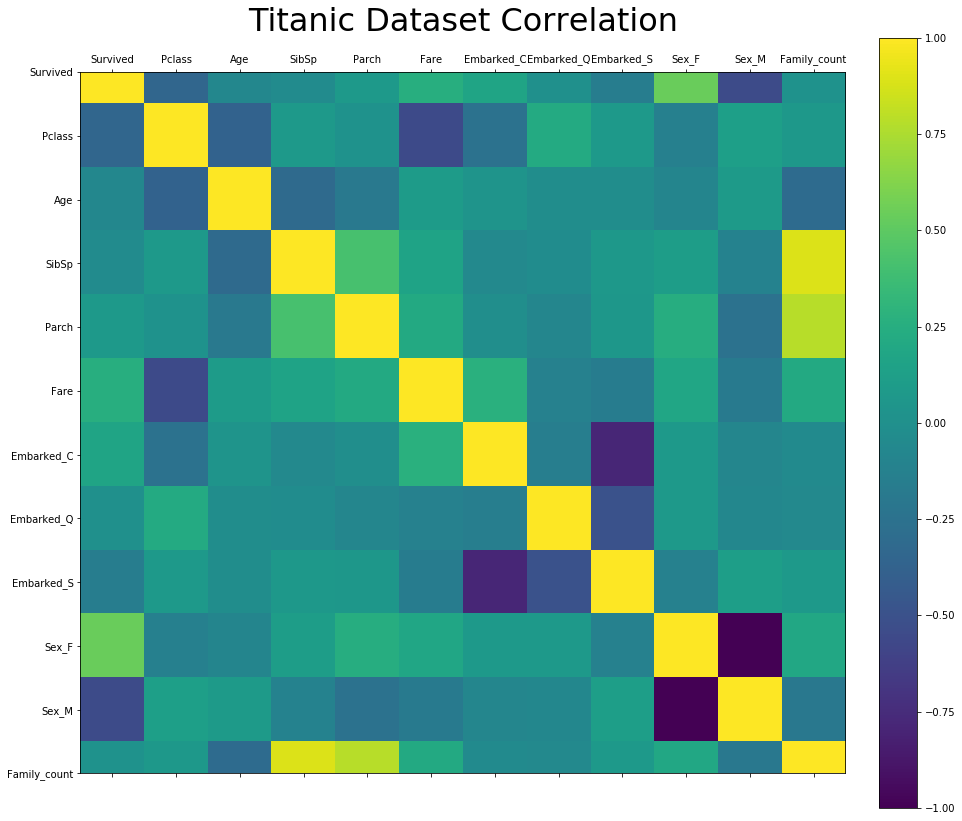

In [72]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( train_titanic , size = 15):
    corr = train_titanic.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=32)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train_titanic, size = 15)

In [73]:
# Prepare DataFrame
df_age = train_titanic.groupby(['Age','Pclass','Sex'])['Survived'].agg(['sum','count']).reset_index()
df_age['surv_by_age'] = df_age['sum'] / df_age['count']
df_age.tail()

,Age,Pclass,Sex,sum,count,surv_by_age
278,70.0,2,male,0,1,0.0
279,70.5,3,male,0,1,0.0
280,71.0,1,male,0,2,0.0
281,74.0,3,male,0,1,0.0
282,80.0,1,male,1,1,1.0


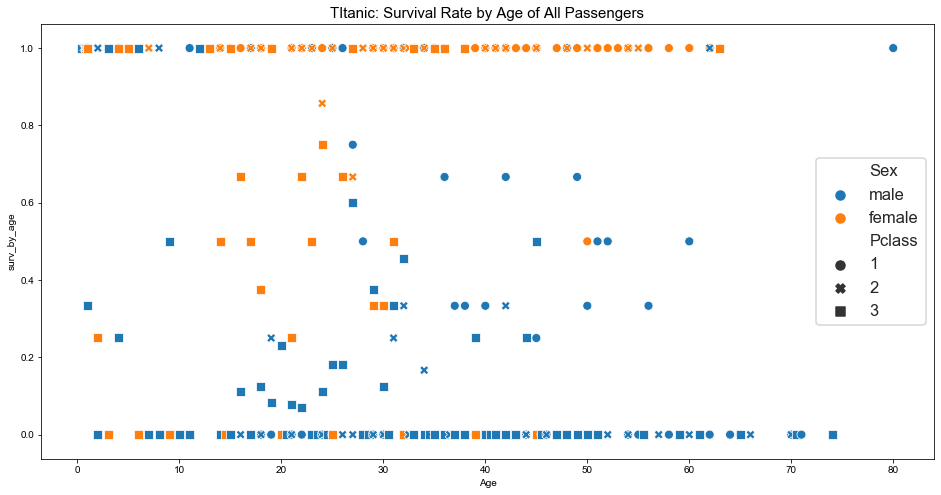

In [74]:
plt.figure(figsize = (16,8))
plt.title("TItanic: Survival Rate by Age of All Passengers", size = 15)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.scatterplot(x = 'Age', y = 'surv_by_age', hue='Sex', style='Pclass', data=df_age)
plt.tight_layout;

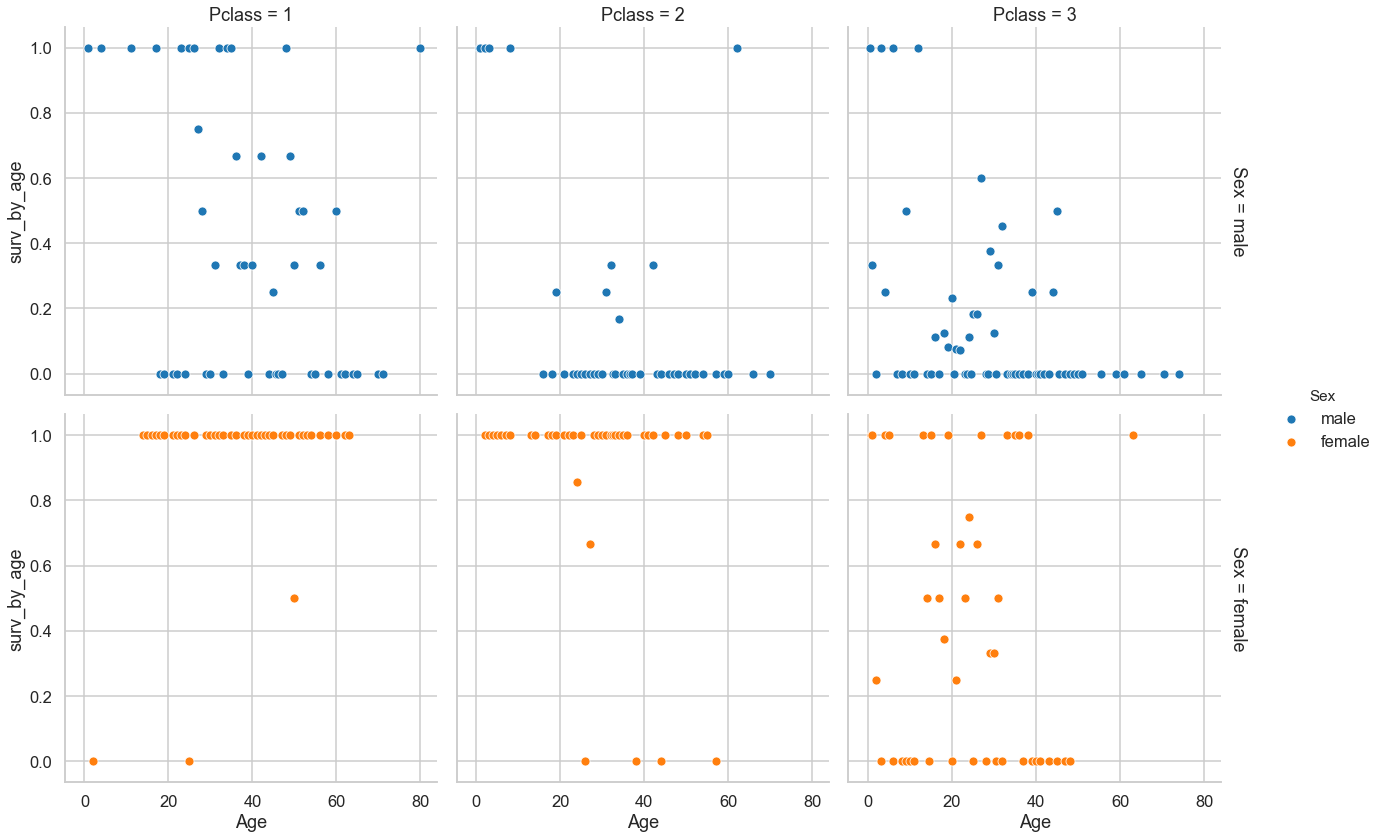

In [75]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.FacetGrid(df_age, col="Pclass", row='Sex', hue='Sex', 
                  margin_titles = True, height=6)
g.map(sns.scatterplot, 'Age', 'surv_by_age')
g.add_legend();

### Univariate Data Analysis

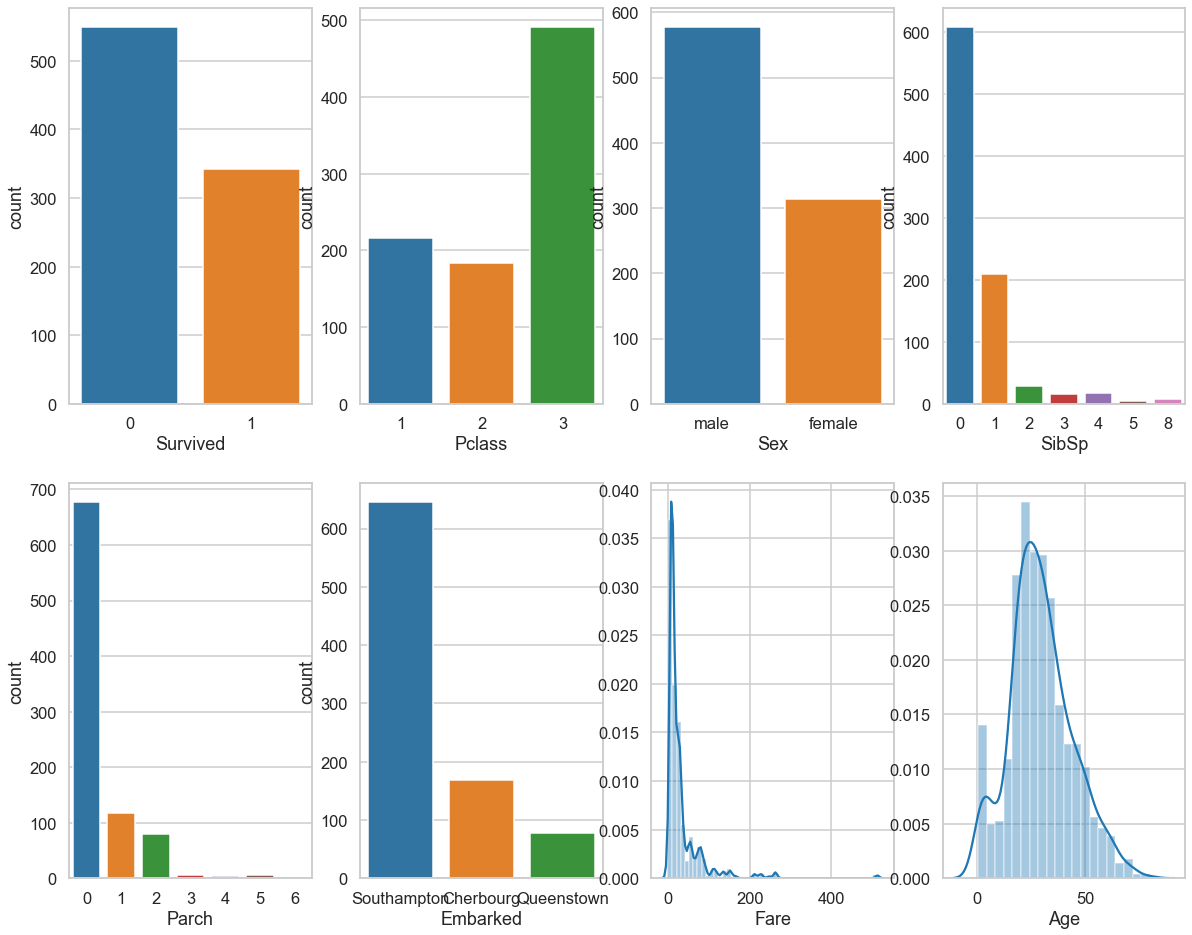

In [76]:
fig , axes = plt.subplots(2, 4, figsize = (20,16) )
sns.countplot('Survived' , data = train_titanic, ax = axes[0,0])
sns.countplot('Pclass' , data = train_titanic, ax = axes[0,1])
sns.countplot('Sex' , data = train_titanic, ax = axes[0,2])
sns.countplot('SibSp' , data = train_titanic, ax = axes[0,3])
sns.countplot('Parch' , data = train_titanic, ax = axes[1,0])
sns.countplot('Embarked' , data = train_titanic, ax = axes[1,1])
sns.distplot(train_titanic['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train_titanic['Age'].dropna() , kde = True , ax = axes[1,3]);

## Bivariate Data Analysis

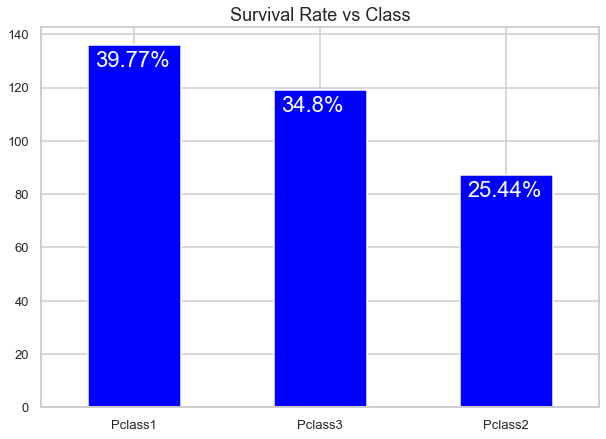

In [77]:
Pclass_survival = train_titanic[train_titanic.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

Text(0.5, 1, ' Histogram of Fare')

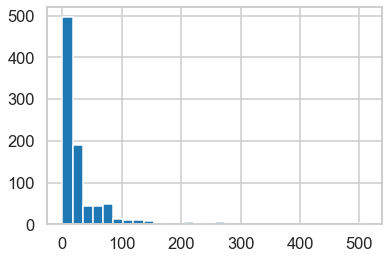

In [78]:
# Histogram  of Fare. 
plt.hist(train_titanic['Fare'], bins=30);
ax.set_title(" Histogram of Fare", fontsize=18)

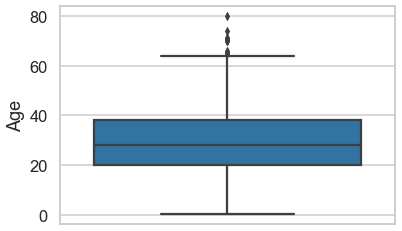

In [79]:
## Age of the passengers follows a relatively normal distribution
sns.boxplot(train_titanic['Age'], orient ='v');

Text(0.5, 1, ' Histogram Show Age')

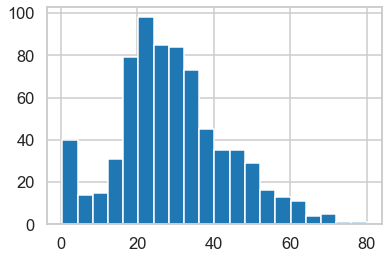

In [80]:
plt.hist(train_titanic['Age'].dropna(), bins=20);
ax.set_title(" Histogram Show Age", fontsize=18)

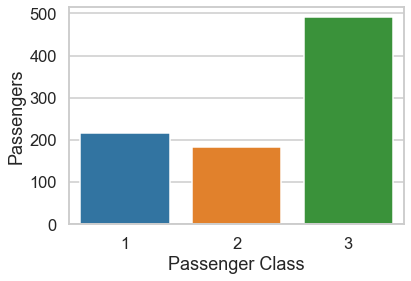

In [81]:
# Titanic passneger class distribution
sns.countplot(x='Pclass', data=train_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()


`This histogram shows how many passengers were in each class. First class and second class had about the same number of people, however third class had more than double the amount of passengers than first or second class.`

`Titanic passenger class was an indicator of socio-economic status.`

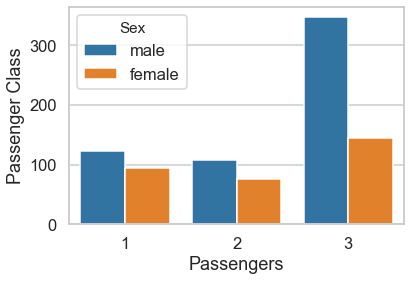

In [83]:
#Plot showing distribution of men, women, and children by passenger class
sns.countplot(x='Pclass', hue = 'Sex',data = train_titanic)
plt.xlabel('Passengers')
plt.ylabel('Passenger Class')
plt.show()

# Conclusion and Analysis of the Data

The deduction gathered is that the greatest chance of surviving the titanic is dependent upon two main factors; sex and passenger class. Age also shows it could be a factor in survivorship, but only when age is simply child vs adult. There are limitatin in the this sample data set which shows not all passengers in the dataset have an Age. It would be quite convoluted and suspicious to make concrete analysis based on a passenger property that is not complete.

The individuals who were more like to survive would be females and more so children who were in first class placement.




`- First class list was a "who's who" of the prominent upper class. A single-person berth in first class also they enjoyed a number of amenities, including a gymnasium, a squash court, a saltwater swimming pool, electric and Turkish baths just to name a few. All first-class accommodations were equipped with telephones, heaters, special gimbal lamps that were designed not to tip over in choppy seas, table fans, and (of course) call bells for summoning the steward. This luxury offered to these individuals of wealth a better opportunity to evacuate to be more aware of any impending dangers as well be closer to the lifeboats at a moments notice.`

`- Second class passesnger slept at the berths built into the wall of the cabins at two or more berths per cabins. Privacy was not a luxury for this category they all used communal bathrooms. As a result of this they were not granted the similar opportunities of evacuation as the first class.` 


`- Third class passengers were subject to cramped conjested cabins where bunk beds were provided. The availability of privacy was non existent where as for over 700 third class passengers 2 bathrooms were availble for use. This circumstance limits the chances of survival based on the conjetion as well as limited communication with the crew members.` 

